## Importing libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix

from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


## Loading dataset and Preprocessing

In [2]:

# df = pd.read_csv("data.csv")
df = pd.read_csv("drive/MyDrive/AI/data_file.csv")
df



,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,VirusShare_a43ceb5e5fffc793e0205d15a0606cb0,a43ceb5e5fffc793e0205d15a0606cb0,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,VirusShare_0190dafc8304111a00fccf57340ea6a4,0190dafc8304111a00fccf57340ea6a4,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,VirusShare_0f3ca55979aaf59158d6b01140696e44,0f3ca55979aaf59158d6b01140696e44,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,VirusShare_fca5ce35f1690db6babca5aa5d559535,fca5ce35f1690db6babca5aa5d559535,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0


In [3]:
# flename and md5Hash are not revelevant in predicting rasomeware
df = df.drop(columns=['FileName','md5Hash'])

In [4]:
df

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0


In [5]:
df.describe()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
count,62485.000000,6.248500e+04,6.248500e+04,62485.000000,62485.000000,6.248500e+04,6.248500e+04,6.248500e+04,62485.000000,62485.000000,62485.000000,6.248500e+04,62485.000000,6.248500e+04,62485.000000,62485.000000
mean,6756.472657,2.587048e+04,1.541611e+05,58.785997,5.417524,8.953186e+05,4.094623e+05,1.466311e+05,9.782604,6.613171,4.751172,8.759830e+05,12966.031400,1.844664e+05,0.018004,0.433992
std,13345.499919,6.461396e+06,1.903142e+06,1114.068244,2.543697,3.779527e+07,2.851820e+07,1.124630e+06,9.047157,16.976465,2.138584,6.288189e+05,15762.725511,1.732625e+07,0.132968,0.495628
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,332.000000,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000e+00,0.000000e+00,4.096000e+03,6.000000,0.000000,3.000000,2.621440e+05,0.000000,1.080000e+03,0.000000,0.000000
50%,332.000000,0.000000e+00,0.000000e+00,0.000000,5.000000,0.000000e+00,0.000000e+00,8.520000e+03,9.000000,0.000000,5.000000,1.048576e+06,320.000000,2.496000e+03,0.000000,0.000000
75%,332.000000,2.800000e+01,1.283200e+04,6.000000,6.000000,2.875200e+04,1.040000e+02,6.553600e+04,11.000000,10.000000,6.000000,1.048576e+06,32768.000000,2.350400e+04,0.000000,1.000000
max,43620.000000,1.615155e+09,2.852127e+08,63325.000000,260.000000,2.147484e+09,2.415919e+09,6.615450e+07,255.000000,255.000000,33.000000,1.677722e+07,58632.000000,4.294942e+09,1.000000,1.000000


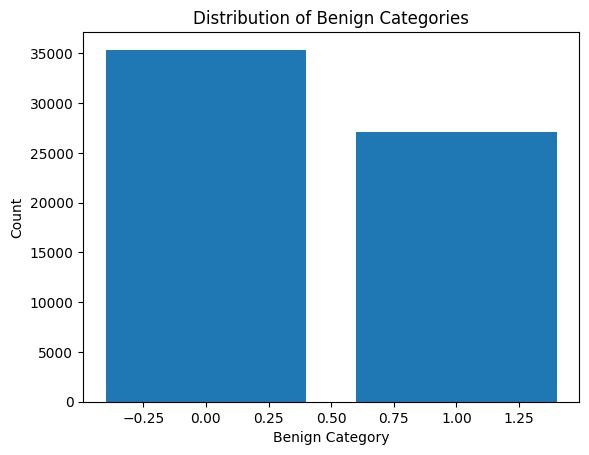

In [6]:
counts = df['Benign'].value_counts()

# Create a bar graph
plt.bar([0, 1], counts.values)

# Add labels and title
plt.xlabel('Benign Category')
plt.ylabel('Count')
plt.title('Distribution of Benign Categories')

# Show the plot
plt.show()

In [7]:
# replace categorical data into numericals, so that model can process it
columns = ["Machine", "DebugSize", "NumberOfSections", "SizeOfStackReserve","MajorOSVersion", "BitcoinAddresses"]
for col in columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

# delete the duplicated rows, only keep the last one
df.drop_duplicates(keep='last')

# save the new datasets into new csv file :
df.to_csv("df_clear.csv")

In [8]:
df = pd.read_csv("df_clear.csv")
df

,Unnamed: 0,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0,1,0,0,0,4,0,0,8192,8,0,2,12,34112,672,0,1
1,1,4,11,121728,10,10,126576,4930,0,14,10,7,9,16864,1024,0,1
2,2,1,0,0,0,4,0,0,8192,8,0,2,12,34112,672,0,1
3,3,4,11,19904,10,10,21312,252,18160,14,10,5,9,16736,1040,0,1
4,4,4,11,97728,10,10,105792,1852,70592,14,10,6,9,16736,1096,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,62480,1,0,0,1,4,0,0,4096,6,0,2,12,0,23504,0,0
62481,62481,1,0,0,7,10,0,0,0,7,0,6,12,0,15704,0,0
62482,62482,1,0,0,0,4,0,0,404908,2,50,10,12,0,2364,0,0
62483,62483,1,0,0,0,4,14448,70,4096,8,0,3,12,0,130296,0,0


In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          62485 non-null  int64
 1   Machine             62485 non-null  int64
 2   DebugSize           62485 non-null  int64
 3   DebugRVA            62485 non-null  int64
 4   MajorImageVersion   62485 non-null  int64
 5   MajorOSVersion      62485 non-null  int64
 6   ExportRVA           62485 non-null  int64
 7   ExportSize          62485 non-null  int64
 8   IatVRA              62485 non-null  int64
 9   MajorLinkerVersion  62485 non-null  int64
 10  MinorLinkerVersion  62485 non-null  int64
 11  NumberOfSections    62485 non-null  int64
 12  SizeOfStackReserve  62485 non-null  int64
 13  DllCharacteristics  62485 non-null  int64
 14  ResourceSize        62485 non-null  int64
 15  BitcoinAddresses    62485 non-null  int64
 16  Benign              62485 non-null  int6

## Distributing dataset to X and y & training and testing

In [10]:
# X contains columns from index 1 to second last
X = df.iloc[:, 1:-1].values
# y contains the last cloumn: benign
y = df.iloc[:,-1].values

In [11]:

X

array([[     1,      0,      0, ...,  34112,    672,      0],
       [     4,     11, 121728, ...,  16864,   1024,      0],
       [     1,      0,      0, ...,  34112,    672,      0],
       ...,
       [     1,      0,      0, ...,      0,   2364,      0],
       [     1,      0,      0, ...,      0, 130296,      0],
       [     1,      0,      0, ...,      0,   6912,      0]])

In [12]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
# Generate random classification data
# X, y = make_classification(n_samples=1000, n_features=15, n_classes=2,random_state=0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [14]:
# Check shape of training and testing data
print('Shape of the training input data:', X_train.shape)
print('Shape of the training output data:', y_train.shape)
print('Shape of the test input data:', X_test.shape)
print('Shape of the test output data:', y_test.shape)

Shape of the training input data: (49988, 15)
Shape of the training output data: (49988,)
Shape of the test input data: (12497, 15)
Shape of the test output data: (12497,)


## Random Forest Classifier

Random Forest Classifier:
Accuracy: 0.9967192126110267
Precision:  0.9962078651685393
Recall:  0.9980301111580132
F1 score:  0.9961920683570168


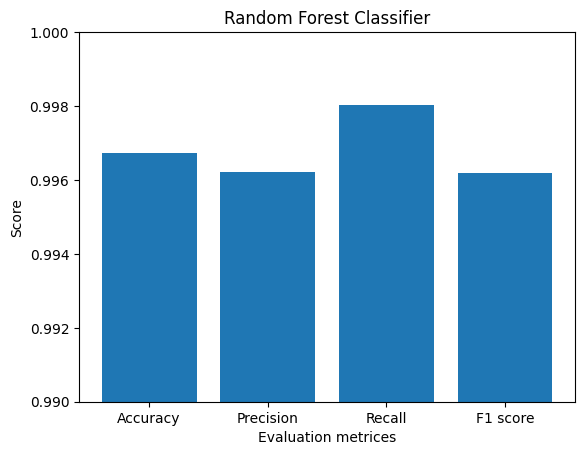

In [15]:

# Create a Random Forest Classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100,random_state=0)

# Fit the Random Forest Classifier to the training data
rf.fit(X_train, y_train)

# Predict the classes of the testing set
y_pred_rfc = rf.predict(X_test)

# Print the evaluation metrix results of the model
print("Random Forest Classifier:")

accuracy_rfc = rf.score(X_test, y_test)
print("Accuracy:", accuracy_rfc)

from sklearn.metrics import precision_score
prec_rfc = precision_score(y_test, y_pred_rfc, pos_label = 0)
print("Precision: ", prec_rfc)

from sklearn.metrics import recall_score
recall_rfc = recall_score(y_test, y_pred_rfc, pos_label = 0)
print("Recall: ", recall_rfc)

from sklearn.metrics import f1_score
f1_rfc = f1_score(y_test, y_pred_rfc)
print("F1 score: ", f1_rfc)

## Bar graph plot
plt.bar(["Accuracy", "Precision", "Recall", "F1 score"], [accuracy_rfc, prec_rfc, recall_rfc, f1_rfc])

plt.ylim(0.99, 1)

plt.title("Random Forest Classifier")
plt.xlabel("Evaluation metrices")
plt.ylabel("Score")
plt.show()



## Logistic Regression

Logistic Regression:
Accuracy: 0.7651436344722733
Precision:  0.9645879732739421
Recall:  0.609399183903194
F1 score:  0.7809211017391953


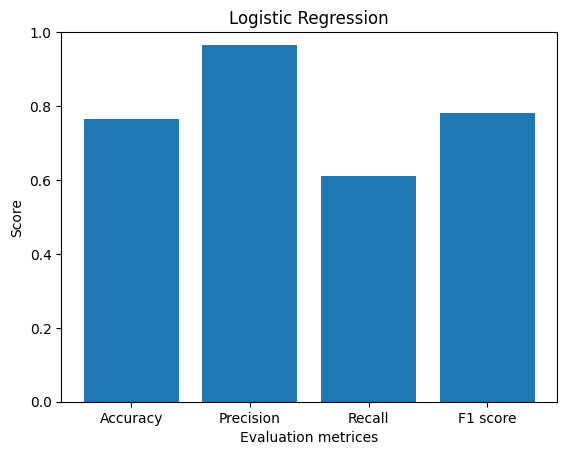

In [16]:
from sklearn.linear_model import LogisticRegression

import numpy as np

model_log = LogisticRegression()
model_log.fit(X_train, y_train)

y_pred_logistic = model_log.predict(X_test)
print("Logistic Regression:")

accuracy_lr = np.mean(y_pred_logistic == y_test)
print("Accuracy:", accuracy_lr)

prec_lr = precision_score(y_test, y_pred_logistic, pos_label = 0)
print("Precision: ", prec_lr)

recall_lr = recall_score(y_test, y_pred_logistic, pos_label = 0)
print("Recall: ", recall_lr)

from sklearn.metrics import f1_score
f1_lr = f1_score(y_test, y_pred_logistic)
print("F1 score: ", f1_lr)

## Bar graph plot
plt.bar(["Accuracy", "Precision", "Recall", "F1 score"], [accuracy_lr, prec_lr, recall_lr, f1_lr])

plt.ylim(0, 1)

plt.title("Logistic Regression")
plt.xlabel("Evaluation metrices")
plt.ylabel("Score")
plt.show()

## K Nearest Neighbours

[1 1 0 ... 1 0 0]
12497
K Nearest Neighbours:
Accuracy: 0.8974153796911258
Precision:  0.9136486294560432
Recall:  0.9051639228929225
F1 score:  0.8817997418403098


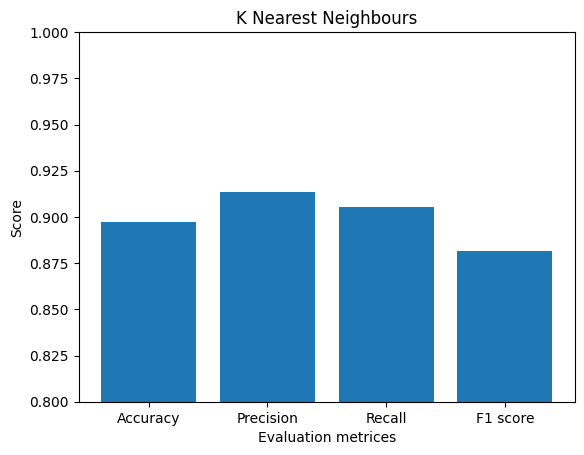

In [17]:

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=251)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)
print(y_pred_knn)
print(y_pred_knn.size)

print("K Nearest Neighbours:")

accuracy_knn = np.mean(y_pred_knn == y_test)
print("Accuracy:", accuracy_knn)

prec_knn = precision_score(y_test, y_pred_knn, pos_label = 0)
print("Precision: ", prec_knn)

recall_knn = recall_score(y_test, y_pred_knn, pos_label = 0)
print("Recall: ", recall_knn)

from sklearn.metrics import f1_score
f1_knn = f1_score(y_test, y_pred_knn)
print("F1 score: ", f1_knn)

## Bar graph plot
plt.bar(["Accuracy", "Precision", "Recall", "F1 score"], [accuracy_knn, prec_knn, recall_knn, f1_knn])

plt.ylim(0.8, 1)

plt.title("K Nearest Neighbours")
plt.xlabel("Evaluation metrices")
plt.ylabel("Score")
plt.show()

## XGBClassifier

12497
XGBClassifier:
Accuracy: 0.9966391934064175
Precision:  0.9962073324905183
Recall:  0.997889404812157
F1 score:  0.9960995542347696


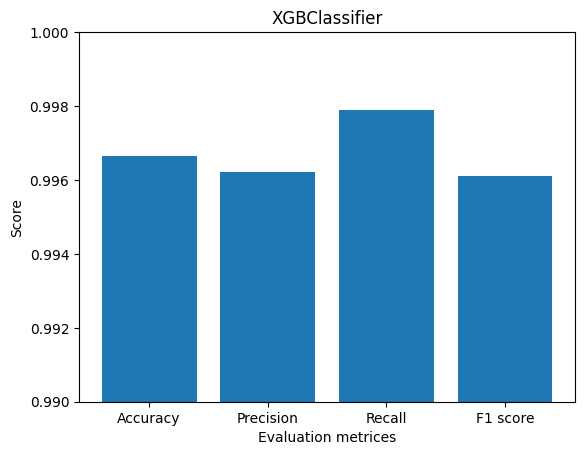

In [18]:
from xgboost import XGBClassifier
# fit the model on the whole dataset
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print(y_pred_xgb.size)

print("XGBClassifier:")

accuracy_xgb = np.mean(y_pred_xgb == y_test)
print("Accuracy:", accuracy_xgb)

prec_xgb = precision_score(y_test, y_pred_xgb, pos_label = 0)
print("Precision: ", prec_xgb)

recall_xgb = recall_score(y_test, y_pred_xgb, pos_label = 0)
print("Recall: ", recall_xgb)

from sklearn.metrics import f1_score
f1_xgb = f1_score(y_test, y_pred_xgb)
print("F1 score: ", f1_xgb)

## Bar graph plot
plt.bar(["Accuracy", "Precision", "Recall", "F1 score"], [accuracy_xgb, prec_xgb, recall_xgb, f1_xgb])

plt.ylim(0.99, 1)

plt.title("XGBClassifier")
plt.xlabel("Evaluation metrices")
plt.ylabel("Score")
plt.show()


## Support Vector Machine (SVM)

Support Vector Machine:
Accuracy: 0.6144674721933264
Precision:  0.5964439201146036
Recall:  0.9959195159701703
F1 score:  0.7809211017391953


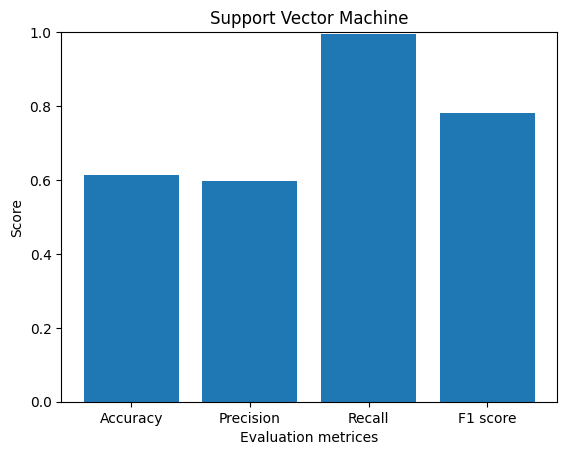

In [19]:
from sklearn.svm import SVC

import numpy as np

model_svm = SVC()
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)
print("Support Vector Machine:")

accuracy_svm = np.mean(y_pred_svm == y_test)
print("Accuracy:", accuracy_svm)

prec_svm = precision_score(y_test, y_pred_svm, pos_label = 0)
print("Precision: ", prec_svm)

recall_svm = recall_score(y_test, y_pred_svm, pos_label = 0)
print("Recall: ", recall_svm)

from sklearn.metrics import f1_score
f1_svm = f1_score(y_test, y_pred_logistic)
print("F1 score: ", f1_svm)

## Bar graph plot
plt.bar(["Accuracy", "Precision", "Recall", "F1 score"], [accuracy_svm, prec_svm, recall_svm, f1_svm])

plt.ylim(0, 1)

plt.title("Support Vector Machine")
plt.xlabel("Evaluation metrices")
plt.ylabel("Score")
plt.show()

## Plots

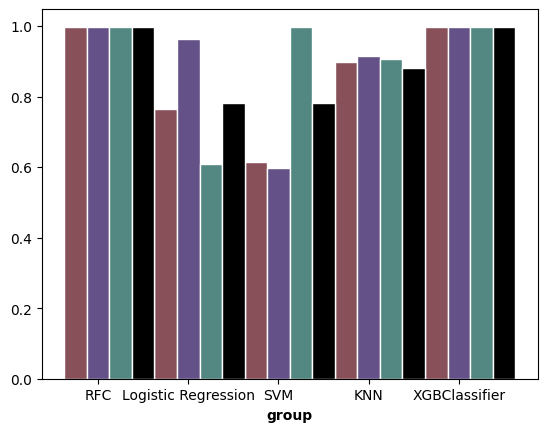

In [20]:
# set width of bars
barWidth = 0.25

# set heights of bars
bars1 = [accuracy_rfc, accuracy_lr, accuracy_svm, accuracy_knn, accuracy_xgb]
bars2 = [prec_rfc, prec_lr, prec_svm, prec_knn, prec_xgb]
bars3 = [recall_rfc, recall_lr, recall_svm, recall_knn, recall_xgb]
bars4 = [f1_rfc, f1_lr, f1_svm, f1_knn, f1_xgb]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Make the plot
plt.bar(r1, bars1, color='#885159', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, bars2, color='#645188', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r3, bars3, color='#528881', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r4, bars4, color='#000000', width=barWidth, edgecolor='white', label='F1 Score')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['RFC', 'Logistic Regression', 'SVM', 'KNN', 'XGBClassifier'])

# Create legend & Show graphic
# plt.legend()
plt.show()

## AUC ROC Curve

Random Classifier: ROC AUC=0.500
RF: ROC AUC=0.999
LR: ROC AUC=0.823
KNN: ROC AUC=0.966
XGB: ROC AUC=1.000


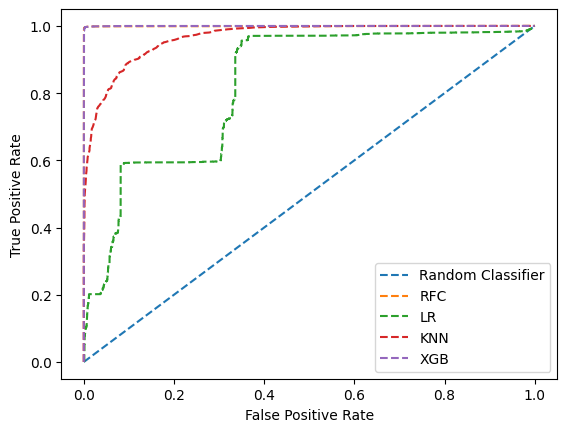

In [21]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for RF
probs_rf = rf.predict_proba(X_test)
probs_log = model_log.predict_proba(X_test)
probs_knn = model_knn.predict_proba(X_test)
probs_xgb = model_xgb.predict_proba(X_test)
# probs_svm = model_svm.predict_proba(X_test)
# print(probs_rf)
# print(probs_rf.shape)

probs_rf = probs_rf[:, 1]
probs_log = probs_log[:, 1]
probs_knn = probs_knn[:, 1]
probs_xgb = probs_xgb[:, 1]
# probs_svm = probs_svm[:, 1]
# print(probs_rf)
# print(probs_rf.shape)

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)

auc_rf = roc_auc_score(y_test, probs_rf)
auc_log = roc_auc_score(y_test, probs_log)
auc_knn = roc_auc_score(y_test, probs_knn)
auc_xgb = roc_auc_score(y_test, probs_xgb)
# auc_svm = roc_auc_score(y_test, probs_svm)

# summarize scores
print('Random Classifier: ROC AUC=%.3f' % (ns_auc))
print('RF: ROC AUC=%.3f' % (auc_rf))
print('LR: ROC AUC=%.3f' % (auc_log))
print('KNN: ROC AUC=%.3f' % (auc_knn))
print('XGB: ROC AUC=%.3f' % (auc_xgb))
# print('SVM: ROC AUC=%.3f' % (auc_svm))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

fpr_rfc, tpr_rfc, _ = roc_curve(y_test, probs_rf)
fpr_log, tpr_log, _ = roc_curve(y_test, probs_log)
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_knn)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, probs_xgb)
# fpr_svm, tpr_svm, _ = roc_curve(y_test, probs_svm)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classifier')

plt.plot(fpr_rfc, tpr_rfc, linestyle='--', label='RFC')
plt.plot(fpr_log, tpr_log, linestyle='--', label='LR')
plt.plot(fpr_knn, tpr_knn, linestyle='--', label='KNN')
plt.plot(fpr_xgb, tpr_xgb, linestyle='--', label='XGB')
# plt.plot(fpr_svm, tpr_svm, marker='.', label='SVM')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Confusion Matrix

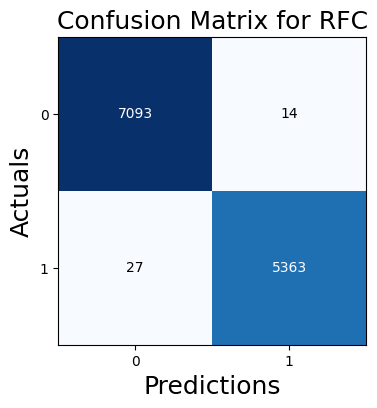

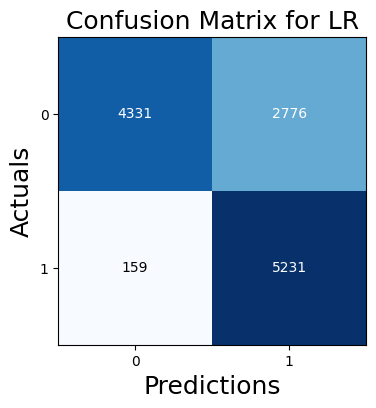

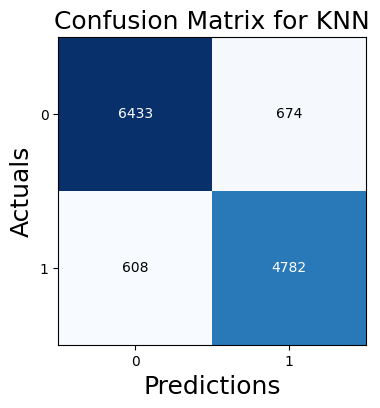

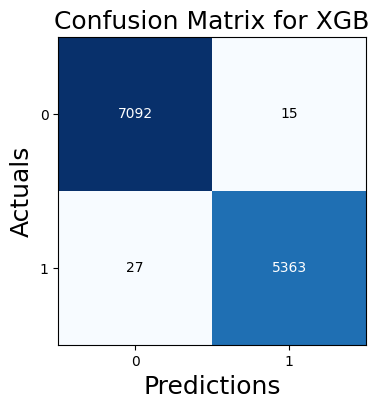

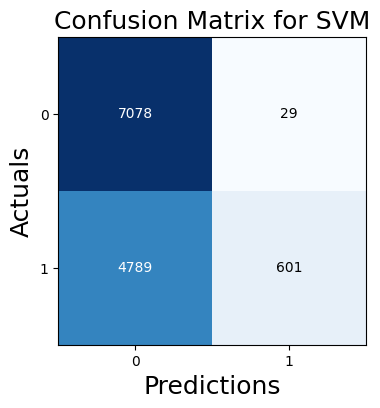

In [22]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
fig, ax = plot_confusion_matrix(conf_mat=cm_rfc , figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for RFC', fontsize=18)
plt.show()

cm_log = confusion_matrix(y_test, y_pred_logistic)
fig, ax = plot_confusion_matrix(conf_mat=cm_log , figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for LR', fontsize=18)
plt.show()

cm_knn = confusion_matrix(y_test, y_pred_knn)
fig, ax = plot_confusion_matrix(conf_mat=cm_knn , figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for KNN', fontsize=18)
plt.show()

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
fig, ax = plot_confusion_matrix(conf_mat=cm_xgb , figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for XGB', fontsize=18)
plt.show()

cm_svm = confusion_matrix(y_test, y_pred_svm)
fig, ax = plot_confusion_matrix(conf_mat=cm_svm , figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for SVM', fontsize=18)
plt.show()